In [ ]:
##We load the packages used at the work
##We are going to use as rule pd for Pandas
##If you are going to use Matplotlib, Numpy or
##other, you should search how to name them 
## as rule.
##For keep the order you can use prettier
## in vscode


##Pandas is similar to tidyverse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
##The next package is used to format tables
##In the next lines you can watch how to use it
from tabulate import tabulate
from sklearn import svm
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import preprocessing
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

##La tabla que vamos a emplear es esta, las demás han
##sido eliminadas
file="SouthGermanCredit.asc"
data=pd.read_csv(file," ")

##We are going to change the name of the variables 
##because in German is difficult to us work.
names={'laufkont':'Status',
        'laufzeit':'Duracion',
        'moral':'Historial_Crediticio',
        'verw':'Proposito',
        'hoehe':'Monto',
        'sparkont':'Ahorros',
        'beszeit':'Tiempo_trabajando',
        'rate':'Porcentaje_salario',
        'famges':'Estado_civil_sexo',
        'buerge':'Otros_deudores',
        'wohnzeit':'Residencia',
        'verm':'Propiedad_valiosa',
        'alter':'Edad',
        'weitkred':'Otras_deudas',
        'wohn':'Residencia',
        'bishkred':'Creditos_banco',
        'beruf':'Empleo',
        'pers':'Personas_dependientes',
        'telef':'Telefono',
        'gastarb':'Extranjero',
        'kredit':'Default',}


data.rename(columns=names,inplace=True)
#print(data.head(5))
#print(tabulate(data.head(5),headers='keys',tablefmt='latex_longtable'))
data.to_csv("datos.csv")

In [ ]:
##It's contructed a table of min and max of all to know if 
##the data doesn't have mistakes
data_1=data.agg(['min','max'])
print(tabulate(data_1.transpose(),headers='keys',tablefmt='latex_longtable'))

In [ ]:
##We are going to construct the tables
##We are going to do a resume of five numbers
##Duracion, Monto, Edad
##First we select this three columns
##This new variable is the data.frame with,
##what we want
data_2=data[['Duracion','Edad','Monto','Tiempo_trabajando']]

summary_2=data_2.describe().transpose()
summary_2=summary_2.loc[:,summary_2.columns!='count']



print(tabulate(summary_2,headers='keys',tablefmt='latex_longtable'))

In [5]:
#We estimate the quartile coefficient of dispersion
#summary_2['Coeficiente de dispersion cuartil']=(summary_2['75%']-summary_2['25%'])/(summary_2['75%']+summary_2['25%'])
#summary_2['Coeficiente de variacion']=summary_2['std']/summary_2['mean']

#print(tabulate(summary_2[['Coeficiente de dispersion cuartial','Coeficiente de variacion']],headers='keys',floatfmt=".4f",tablefmt='latex_longtable'))

In [ ]:
##A table count historial and default
historial_default=pd.crosstab(index=data['Default'],columns=data['Historial_Crediticio'],margins=True)
print(tabulate(historial_default,headers='keys',tablefmt='latex_longtable'))

In [ ]:
##A table count savings and default
savings_default=pd.crosstab(index=data['Default'],columns=data['Ahorros'])
print(tabulate(savings_default,headers='keys',tablefmt='latex_longtable'))

Graficos de analisis descriptivo

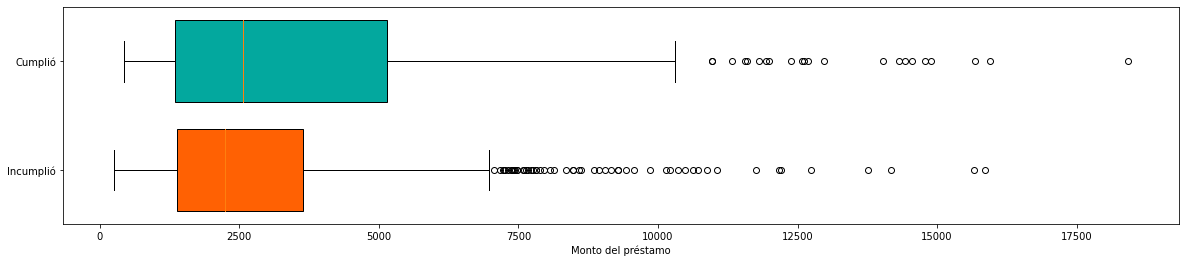

In [8]:
datosG1 = data.loc[:, ["Monto", "Default"]]
datosG2 = [datosG1[datosG1["Default"]==1].Monto, datosG1[datosG1["Default"]==0].Monto]
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

# rectangular box plot
bplot1 = ax1.boxplot(datosG2,
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=["Incumplió", "Cumplió"],
                     widths=(0.75, 0.75))  # will be used to label x-ticks

# Add some text for labels, title and custom x-axis tick labels, etc.                
#ax1.set_ylabel('Condición del prestamo')
ax1.set_xlabel('Monto del préstamo')
# fill with colors
for patch, color in zip(bplot1['boxes'], [ '#FF6103', '#03A89E']):
        patch.set_facecolor(color)

#plt.savefig('montos.pdf', bbox_inches='tight')
plt.show()


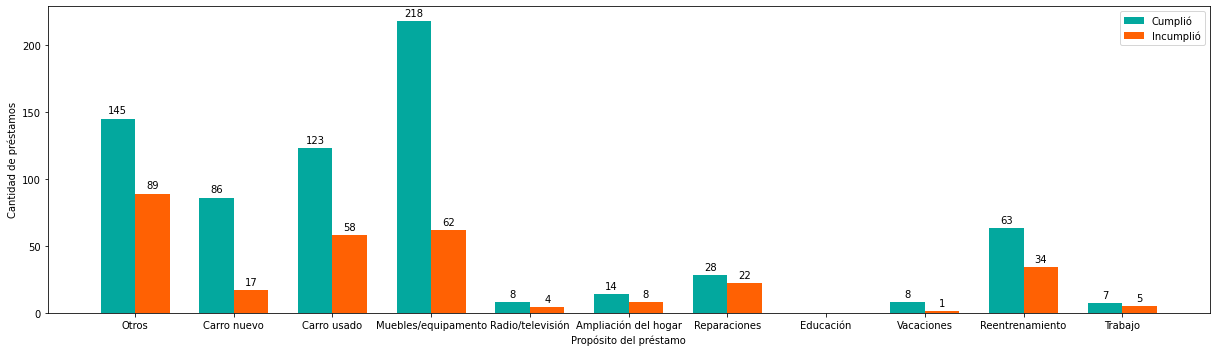

In [9]:
#Hacer que para cada uno de los labels este los defalu, me gusta más
datosG1 = data.loc[:, ["Proposito", "Default"]]
datosG1[datosG1["Default"]==1]
labels = [
    "Otros",
    "Carro nuevo",
    "Carro usado",
    "Muebles/equipamento",
    "Radio/televisión",
    "Ampliación del hogar",
    "Reparaciones",
    "Educación",
    "Vacaciones",
    "Reentrenamiento",
    "Trabajo"
]

eje1=np.unique(datosG1[datosG1["Default"]==1].Proposito, return_counts=True)
eje2=np.unique(datosG1[datosG1["Default"]==0].Proposito, return_counts=True)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 5))
rects1 = ax.bar(eje1[0]- width/2 ,eje1[1], width, label='Cumplió', color=[ "#03A89E"])
rects2 = ax.bar(eje2[0]+ width/2, eje2[1], width, label='Incumplió', color=["#FF6103"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de préstamos')
ax.set_xlabel('Propósito del préstamo')
#ax.set_title('Distribución de los motivos por los cuales se solicita un crédito')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

#plt.savefig('Proposito.pdf', bbox_inches='tight')
plt.show()


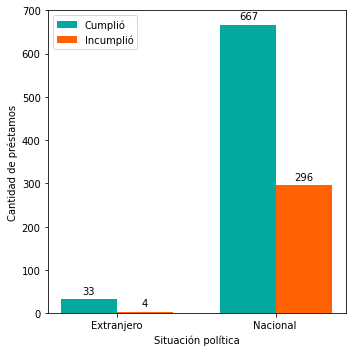

In [10]:
#Hacer que para cada uno de los labels este los defalu, me gusta más
datosG1 = data.loc[:, ["Extranjero", "Default"]]
datosG1[datosG1["Default"]==1]
labels = ["Extranjero", "Nacional "]

eje1=np.unique(datosG1[datosG1["Default"]==1].Extranjero, return_counts=True)
eje2=np.unique(datosG1[datosG1["Default"]==0].Extranjero, return_counts=True)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
rects1 = ax.bar(eje1[0]- width/2 ,eje1[1], width, label='Cumplió', color=[ "#03A89E"])
rects2 = ax.bar(eje2[0]+ width/2, eje2[1], width, label='Incumplió', color=[ "#FF6103"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de préstamos')
ax.set_xlabel('Situación política')
#ax.set_title('Distribución de la nacionalidad')
ax.set_xticks([1,2])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

#plt.savefig('nacionalidad.pdf', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


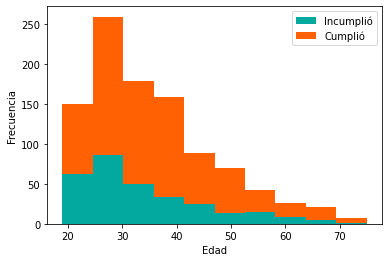

In [11]:
color=["#03A89E","#FF6103"]


pd.DataFrame({'Incumplió': data.groupby('Default').get_group(0).Edad,'Cumplió':   data.groupby('Default').get_group(1).Edad}).plot.hist(stacked=True, color = color).axes.get_xaxis()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.savefig('AgeDistribution.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


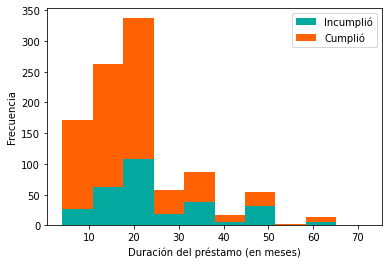

In [12]:
pd.DataFrame({'Incumplió': data.groupby('Default').get_group(0).Duracion,'Cumplió':   data.groupby('Default').get_group(1).Duracion}).plot.hist(stacked=True, color = color)
plt.xlabel("Duración del préstamo (en meses)")
plt.ylabel("Frecuencia")
plt.savefig('DurationDistribution.eps', format='eps')
plt.show()


In [ ]:
data_5=data[['Tiempo_trabajando','Historial_Crediticio','Edad']]

data_6= data_5.groupby(['Tiempo_trabajando','Historial_Crediticio'], as_index=False)["Edad"].count()


print(data_6)
df2=data_6.pivot(index='Historial_Crediticio', columns='Tiempo_trabajando', values='Edad')
df2

df2.fillna(0)


print(df2)

sns.heatmap(df2,cmap="Blues")

In [14]:
#Before we start we are going to change the model form 0 to -1
#data.loc[data.Default==0,'Default']=-1

#Here we are going to construct the way in wich we construct the sample
#Neverthless what we want to make to this is a model that at this moment have not been programmed so we are going to select the sample dividing the table in two the good and the bads 
#In this case we are going to select 80% of the good and bads, and also for
#20% of training
#goods=data[(data['Default']==1)]
#bads=data[(data['Default']==-1)]


#Presentado
#goods_random=goods.sample(n=round(len(goods)*0.8),replace=False)
#bads_random=bads.sample(n=round(len(bads)*0.8),replace=False)
#train=pd.concat([goods_random,bads_random])
#test_random=data.drop(train.index)
#X_train=train.drop('Default',1).values.tolist()
#Y_train=train[['Default']].values.ravel()
#X_test=test_random.drop('Default',1).values.tolist()
#Y_test_real=test_random[['Default']].values.ravel()




In [15]:
#Here we are going to program the svm, but with the four basic kernels,
#and with the same gamma
#We are going to keep the basic adjustment for in this case
#And we compare also it with the proposed by Ben-David and Shalev

##Linear, This is not accomplised for our data set
#linear_svm=svm.SVC(kernel='linear',probability=True)
#linear_svm.fit(X_train,Y_train)

##Polynomial of grade 2
#poly_svm=svm.SVC(kernel='poly',degree=2,C=97,class_weight="balanced")
#poly_svm.fit(X_train,Y_train)

##Gaussian Kernel
#gauss_svm=svm.SVC(kernel='rbf',C=97,class_weight="balanced")
#gauss_svm.fit(X_train,Y_train)

##sigmoid
#sigm_svm=svm.SVC(kernel='sigmoid',C=96,class_weight="balanced")
#sigm_svm.fit(X_train,Y_train)


In [16]:
# We are going to construct the model here based in the model
#presented by Ben-David and Shalev
##Polynomial of grade 2

#poly_svm_bd=svm.SVC(kernel='poly',degree=2,probability=True,C=1/len(X_test))
#poly_svm_bd.fit(X_train,Y_train)

##Probando 
# fit a svm on an imbalanced classification dataset
#from numpy import mean
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.svm import SVC
#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores=cross_val_score(poly_svm,X_train,Y_train,scoring='roc_auc',cv=cv,#n_jobs=-1)
#print(mean(scores))


##Gaussian Kernel
#gauss_svm_bd=svm.SVC(kernel='rbf',probability=True,C=1/len(X_test))
#gauss_svm_bd.fit(X_train,Y_train)

##sigmoid
#sigm_svm_bd=svm.SVC(kernel='sigmoid',probability=True,C=1/len(X_test))
#sigm_svm_bd.fit(X_train,Y_train)



In [39]:

#We preparate the data to be used
X=data.drop('Default',1)
#X=(X-X.mean())/X.std()
X=X.values.tolist()
Y=data[['Default']]
#We make a set of train and a set of test
X_train, X_test, Y_train, Y_test_real=train_test_split(X,Y,test_size=0.2)

#We scale the data
#scaler_train=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler_train.transform(X_train)
#scaler_test=preprocessing.StandardScaler().fit(X_test)
#X_test=scaler_test.transform(X_test)
Y_train=Y_train.values.ravel()
Y_test_real=Y_test_real.values.ravel()

#We define the kernels
kernels=['poly','rbf','sigmoid']
#We define crossvalidation
cv=RepeatedStratifiedKFold(n_splits=10)
#First we select the parameter C by crossvalidation and compare the results for every kernel
#We penalize the class with more observatinos
C=0
best_score=0
model=''
kernel=[]
tolerance=[]
scores=[]
#paint=[]

for j in kernels:
    for i in [1,*range(10,110,10)]:
        model=svm.SVC(kernel=j,C=i,degree=3,class_weight='balanced')
        score = mean(cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        kernel.append(j)
        tolerance.append(i)
        scores.append(score)
        #paint.append(color_triad[k]) 
        if score>best_score:
            best_score=score
            model=j
            C=i
print(C,model,best_score)

C:\Users\saac9\AppData\Local\Temp\ipykernel_4000\69142904.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Default',1)


1 SVC(C=100, class_weight='balanced', kernel='sigmoid') 0.778422619047619


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


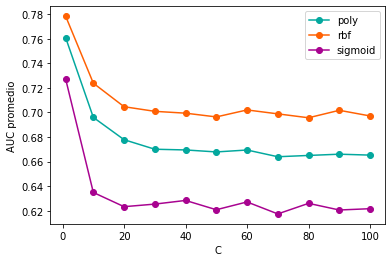

In [42]:
#We construct a dataframe to graph the results of cross validation balanced
result_cross_val={'Kernel':kernel,'C':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)
#We create the graph
color_triad=["#03A89E","#FF6103",'#A80390']
k=0
groups=result_cross_val.groupby('Kernel')
for name, group in groups:
    plt.plot(group['C'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=kernels[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('C')
plt.ylabel('AUC promedio')
#result_cross_val.set_index('C',inplace=True)
#result_cross_val.groupby('Kernel')['AUC'].plot(legend=True)
plt.savefig("AUC_cross_v_b.eps", format="eps")

In [43]:
C=0
best_score=0
model=''
kernel=[]
tolerance=[]
scores=[]
#paint=[]

for j in kernels:
    for i in [1,*range(10,110,10)]:
        model=svm.SVC(kernel=j,C=i,degree=3)
        score = mean(cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        kernel.append(j)
        tolerance.append(i)
        scores.append(score)
        #paint.append(color_triad[k]) 
        if score>best_score:
            best_score=score
            model=j
            C=i
print(C,model,best_score)

1 SVC(C=100, kernel='sigmoid') 0.7687276785714287


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


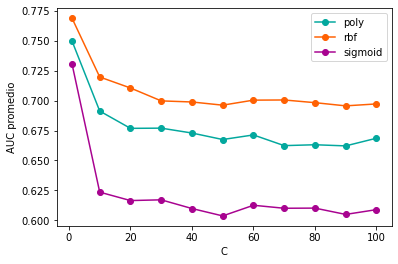

In [44]:
#We construct a dataframe to graph the results of cross validation unbalanced
result_cross_val={'Kernel':kernel,'C':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)
#We create the graph
color_triad=["#03A89E","#FF6103",'#A80390']
k=0
groups=result_cross_val.groupby('Kernel')
for name, group in groups:
    plt.plot(group['C'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=kernels[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('C')
plt.ylabel('AUC promedio')
#result_cross_val.set_index('C',inplace=True)
#result_cross_val.groupby('Kernel')['AUC'].plot(legend=True)
plt.savefig("AUC_cross_v_ub.eps", format="eps")

In [41]:
#confusion matrix

def confusion(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Predicciones=modelo.predict(X_test)
    fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
    matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
    matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
    matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    matrix_conf.ax_.set_title("Matriz de confusión")

In [29]:
#ROC and AUC
def curvasROC(modelo):
    Predicciones =modelo.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test_real,Predicciones).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    roc_auc = metrics.auc(([0., fpr, 1.]),([0., tpr, 1.]))

    fig, ax = plt.subplots(figsize=(5, 5))
    Probabilistico=RocCurveDisplay.from_estimator(modelo, X_test,
     Y_test_real, color= "#FF6103" , ax = ax, name = "ROC probabilística")

    display=RocCurveDisplay(fpr=([0., fpr, 1.]), tpr=([0., tpr, 1.]),  roc_auc=roc_auc,
                                   estimator_name='ROC puntual')
    display.plot(color="#03A89E",ax=ax)

    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
    plt.scatter(fpr, tpr, color ="#03A89E" )
    plt.xlabel("1-Especificidad")
    plt.ylabel("Sensibilidad")
    plt.title("Curva ROC y valor AUC")

In [ ]:
#We take the model with rbf kernel and parameter and graph the roc curve and confusion matrix
svm_rbf=svm.SVC(kernel='rbf',probability=True,C=1,class_weight='balanced')
svm_rbf.fit(X_train,Y_train)
curvasROC(svm_rbf)
plt.savefig("AUC_prediccion.eps", format="eps")
confusion(svm_rbf)
plt.savefig("matriz_confusion.eps", format="eps")

In [ ]:
##Polynomial of grade 2
confusion(poly_svm)
#plt.savefig("MCGrado2Normal.eps", format="eps")
curvasROC(poly_svm)
#plt.savefig("ROCGrado2Normal.eps", format="eps")

##Gaussian Kernel
confusion(gauss_svm)
#plt.savefig("MCgaussNormal.eps", format="eps")
curvasROC(gauss_svm)
#plt.savefig("ROCgaussNormal.eps", format="eps")

##sigmoid
confusion(sigm_svm)
#plt.savefig("MCsigmNormal.eps", format="eps")
curvasROC(sigm_svm)
#plt.savefig("ROCsigmNormal.eps", format="eps")

#presented by Ben-David and Shalev
##Polynomial of grade 2
#confusion(poly_svm_bd)
#plt.savefig("MCGrado2BD.eps", format="eps")
#curvasROC(poly_svm_bd)
#plt.savefig("ROCGrado2BD.eps", format="eps")

##Gaussian Kernel
#confusion(gauss_svm_bd)
#plt.savefig("MCgaussBD.eps", format="eps")
#curvasROC(gauss_svm_bd)
#plt.savefig("ROCgaussBD.eps", format="eps")

##sigmoid
#confusion(sigm_svm_bd)
#plt.savefig("MCsigmBD.eps", format="eps")
#curvasROC(sigm_svm_bd)
#plt.savefig("ROCsigmBD.eps", format="eps")
#para ver si funciona X2
#Cambio vacio para ver si se descarga lo de moises

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
fig = plt.subplots(figsize=(5, 5))
ax = plt.subplots(figsize=(5, 5))
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test_real, y_pred)
cnf_matrix=ConfusionMatrixDisplay(cnf_matrix, display_labels=['V','F'])
cnf_matrix.plot(colorbar=False, ax=ax, cmap="Blues")
cnf_matrix.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
cnf_matrix.ax_.set_title("Matriz de confusión")
cnf_matrix

In [ ]:
def confusion(modelo2):
    fig, ax = plt.subplots(figsize=(5, 5))
    cnf_matrix=metrics.confusion_matrix(Y_test_real, y_pred, labels=[1,0])
    cnf_matrix=ConfusionMatrixDisplay(cnf_matrix, display_labels=['V','F'])
    cnf_matrix.plot(colorbar=False, ax=ax, cmap="Blues")
    cnf_matrix.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    cnf_matrix.ax_.set_title("Matriz de confusión")
    cnf_matrix

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_real,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test_real, y_pred_proba)
plt.plot(fpr,tpr,label="Curva ROC, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
plt.savefig("RocCurveLogistic.eps", format="eps")
plt.show()
#plt.savefig("RocCurveLogistic.eps", format="eps")

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train,Y_train)

In [ ]:
def confusion(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Predicciones=modelo.predict(X_test)
    fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
    matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
    matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
    matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    matrix_conf.ax_.set_title("Matriz de confusión")

In [ ]:
confusion(logreg)
plt.savefig("confusionmatrixlog.eps", format="eps")

In [ ]:
def curvasROC(modelo):
    Predicciones =modelo.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test_real,Predicciones).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    roc_auc = metrics.auc(([0., fpr, 1.]),([0., tpr, 1.]))

    fig, ax = plt.subplots(figsize=(5, 5))
    Probabilistico=RocCurveDisplay.from_estimator(modelo, X_test,
     Y_test_real, color= "#FF6103" , ax = ax, name = "ROC")


    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
    #plt.scatter(fpr, tpr, color ="#03A89E" )
    plt.xlabel("1-Especificidad")
    plt.ylabel("Sensibilidad")
    plt.title("Curva ROC y valor AUC")

In [ ]:
curvasROC(logreg)
plt.savefig("ROClog.eps", format="eps")